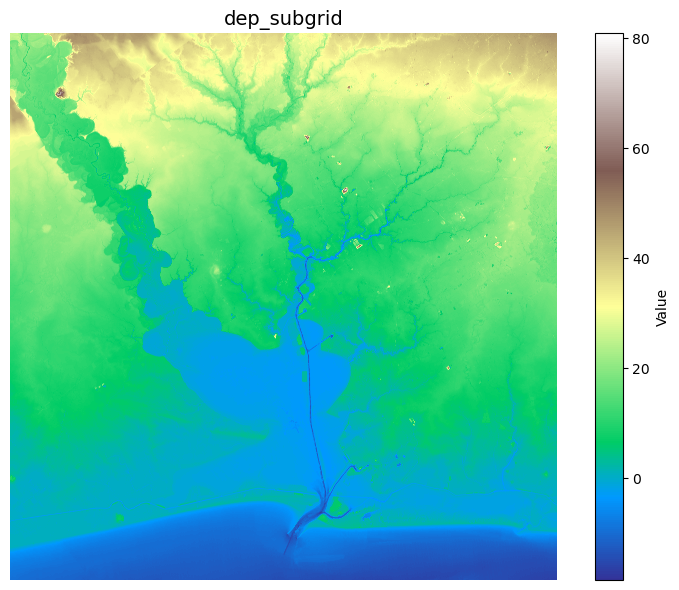

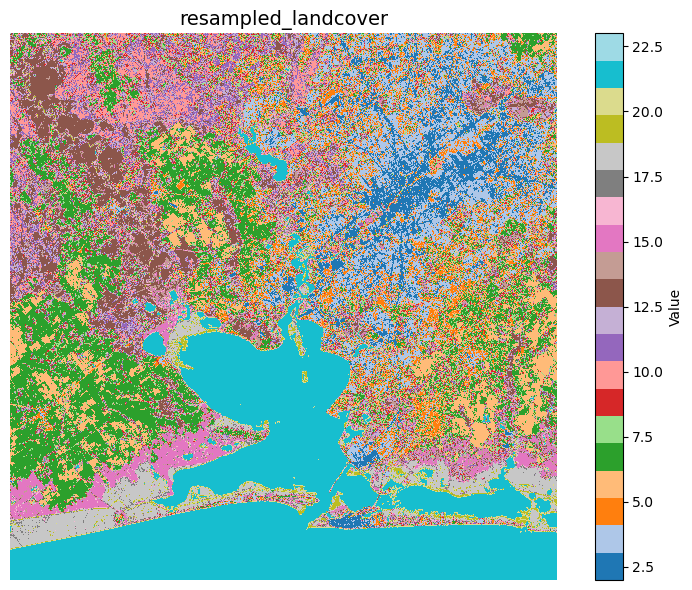

NameError: name 'CFM_WD_FINAL_TIF' is not defined

In [6]:
# 📦 Imports
import sys
import os
sys.path.append(os.path.abspath("../"))

import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import warnings
warnings.filterwarnings('ignore')

# 🚀 Custom Functions
from config import (
    DEM_FILE, LANDCOVER_FILE, CFM_WD_TIF

)

# DISCLAIMER: THE VISUALIZATION OF THE FILES IS REPRESENTATIVE, IT IS RECOMMENDED TO USE ArcGIS or QGIS

def plot_raster_simple(raster_path, cmap='Blues', confusion=False):
    """
    Plot a raster using rasterio with nodata masking.
    Optionally apply confusion matrix colors.

    Parameters
    ----------
    raster_path : str
        Path to the raster file (.tif).
    cmap : str
        Colormap name for regular plots (ignored if confusion=True).
    confusion : bool
        Whether to apply custom confusion matrix coloring.
    """
    with rasterio.open(raster_path) as src:
        data = src.read(1)
        nodata = src.nodata

    # Mask nodata
    if nodata is not None:
        data = np.where(data == nodata, np.nan, data)

    # 🔄 Rotate 180 degrees
    data = np.flipud(np.fliplr(data))

    # Plot
    plt.figure(figsize=(8, 6))

    plt.imshow(data, cmap=cmap)
    plt.colorbar(label="Value")

    plt.title(os.path.splitext(os.path.basename(raster_path))[0], fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


# 🗺️ Plotting Each Raster

# Plot DEM
plot_raster_simple(DEM_FILE, cmap='terrain')

# Plot Land Cover
plot_raster_simple(LANDCOVER_FILE, cmap='tab20')

# 📈 Plot PreCCFM Flood Map (water depth)
plot_raster_simple(CFM_WD_FINAL_TIF, cmap='cividis')

